

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The selected dataset is the TMDB dataset which contains the data on movies as well as ratings

Exploration of the following treands will be done:
    > Runtime of movies over the years 
    > Popularity of movies over the years
    > Revenue of movies over the years
    
Associations of various factors to be seen are:
    > Revenue vs Popularity
    > Runtime vs Popularity
    > Runtime vs Revenue

In [77]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# <a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties
        > Rows: 4813
        > Columns: 18
Null values are present in variables which are as follows: 
    imdb_id
    cast
    homepage
    director
    tagline
    keywords
    overview
    genres
    production_companies
    
Steps for cleaning the data:

1.Data seems to be relatively clean

2.one duplicate record is foud and is deleted 

3.Of the different variables, imdb_id is significant to identify the records uniquely. Only 10 of 10865 are missing. Hence, we only drop the records with this value as missing.

4.Some other values with missing values are significant so they are retained 

In [6]:
pwd

'C:\\Users\\hi\\Desktop\\dand pro 3'

In [7]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb_movies.csv',encoding='ISO-8859-1')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

# Finding and dealing with Duplicates
Here, we check for duplicates. These would be redundant records for our investigation and if present, can be dropped from the dataset

In [9]:
# checking number of duplicate records
sum(df.duplicated())

1

In [10]:
# drop rows that are duplicates 
# save in dataset itself, so that data is devoid of duplicates 
df.drop_duplicates(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

# NULL Values:
This step is to inspect if data is sufficient for initial exploration and research. Depending on the results, we also will have to decide on how best to tackle missing values, based on their relative proportion to complete data.

In [12]:
# check if any columns contain null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning (Dropping some rows)
1.After viewing the TMDb dataset and deleting duplicate records, we perform cleaning steps in this part

2.As we saw from the previous step that we have null values in certain columns. Of these, imdb_id is of relevance to us. The number of records with missing imdb_id values are only 10 out of 10865. Hence, we are removing rows with null values only in imdb_id column using dropna method.

3.Remaining columns containing missing values are not factors of interest in this initial exploration. The questions we have posed in our EDA consider factors having no missing values. So, we leave the remaining missing values.

In [13]:
#droping rows containing missing values in imdb_id column
df.dropna(subset=['imdb_id'], inplace=True)  
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 21 columns):
id                      10855 non-null int64
imdb_id                 10855 non-null object
popularity              10855 non-null float64
budget                  10855 non-null int64
revenue                 10855 non-null int64
original_title          10855 non-null object
cast                    10779 non-null object
homepage                2934 non-null object
director                10815 non-null object
tagline                 8038 non-null object
keywords                9368 non-null object
overview                10852 non-null object
runtime                 10855 non-null int64
genres                  10834 non-null object
production_companies    9830 non-null object
release_date            10855 non-null object
vote_count              10855 non-null int64
vote_average            10855 non-null float64
release_year            10855 non-null int64
budget_adj              1

In [14]:
#checking dataset 
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [22]:
# save new cleaned dataset.
# we will use this dataset in next sections
df.to_csv('data_imdb.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1:
    what are the treands of runtimes, popularity and revenues over time ?
    1.For this analysis, we first group our data based on years, using the variable 'release_year
    
    2.After that we use the built in histogram function to visualize our answer.

In [27]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df_imdb = pd.read_csv('data_imdb.csv',encoding='ISO-8859-1')
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10855 entries, 0 to 10854
Data columns (total 21 columns):
id                      10855 non-null int64
imdb_id                 10855 non-null object
popularity              10855 non-null float64
budget                  10855 non-null int64
revenue                 10855 non-null int64
original_title          10855 non-null object
cast                    10779 non-null object
homepage                2934 non-null object
director                10815 non-null object
tagline                 8038 non-null object
keywords                9368 non-null object
overview                10852 non-null object
runtime                 10855 non-null int64
genres                  10834 non-null object
production_companies    9830 non-null object
release_date            10855 non-null object
vote_count              10855 non-null int64
vote_average            10855 non-null float64
release_year            10855 non-null int64
budget_adj              1

In [30]:
#group the input data by release_year variable and compute mean values for the numeric columns [our values of interest]
df_new = df_imdb.groupby('release_year').mean()

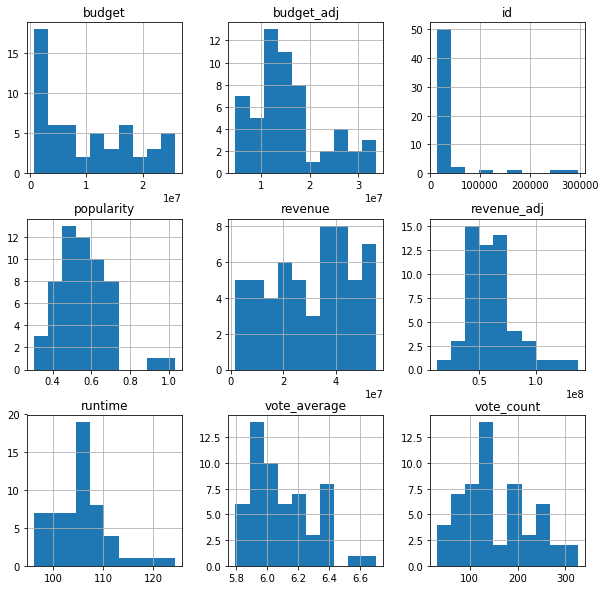

In [31]:
#Initial exploration to see possible trends visually
df_new.hist(figsize=(10,10));

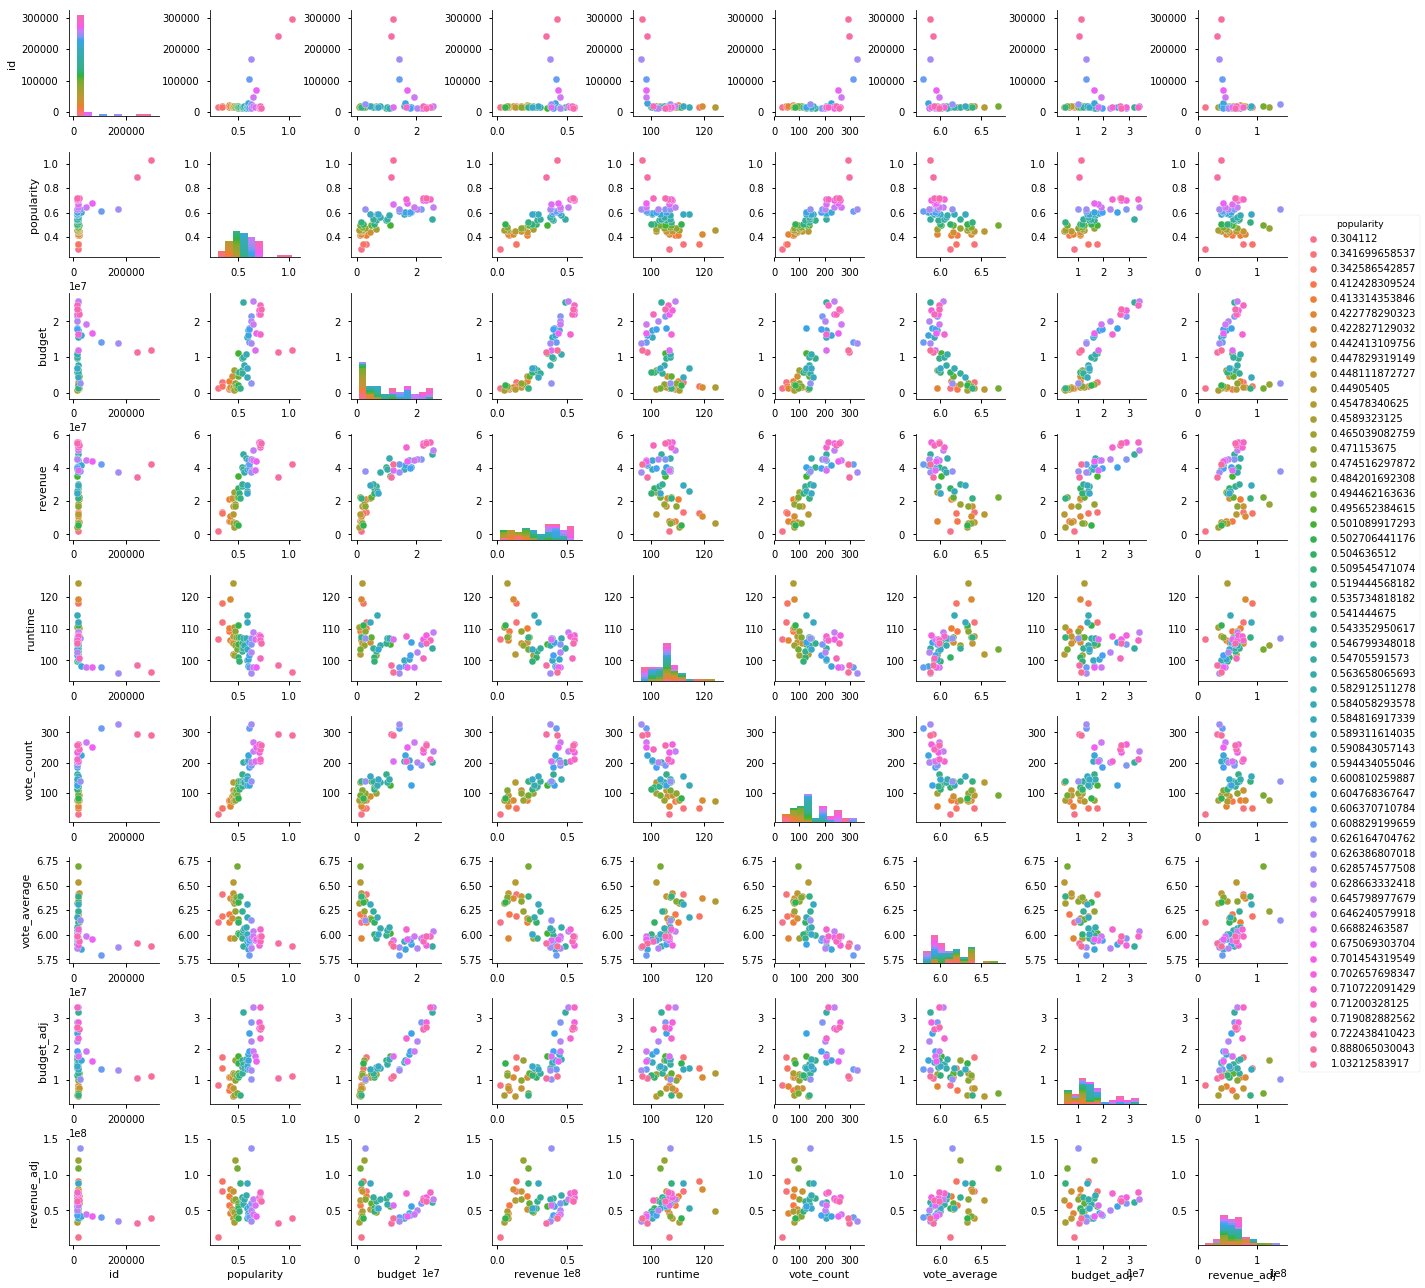

In [84]:
# summary of the dataset using seaborn which is used for visualization
sns.pairplot(df_new,size=2,hue='popularity')

# Runtime

We wish to determine if over the years, there is popular movie running duration
Accordingly, we use a histogram to observe the counts of movie runtimes from our new dataset
Maximum counts will reflect the duration that most movies run

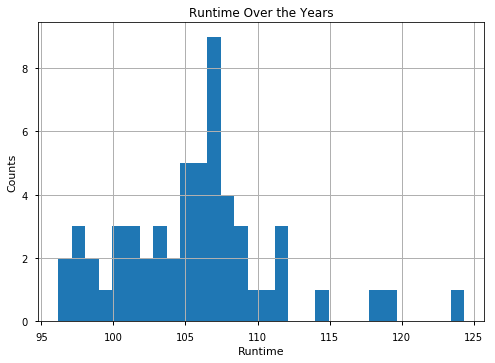

In [69]:
#xploring runtime over the years
df_new['runtime'].hist(bins=30)
plt.xlabel('Runtime')
plt.ylabel('Counts')
plt.title('Runtime Over the Years');
plt.style.use('seaborn-notebook')
plt.show()

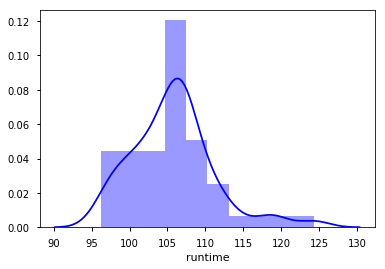

In [96]:
#using seaborn distplot which helps in visualising the type of distribution
sns.distplot(df_new['runtime'],color='b')

In [52]:
# this statistic is used to answer the question mathematically
df_new['runtime'].describe()

count     56.000000
mean     105.714644
std        5.508458
min       96.179331
25%      101.910776
50%      105.678699
75%      107.593247
max      124.343750
Name: runtime, dtype: float64

# Observations about Runtimes:
As seen in the plots and functions above, popular runtimes over the years are between 106 and 107 minutes.
Maximum movies fell in the 105-107 range.
The distribution is right skewed.

# Popularity


We wish to determine if over the years, what is the likely rating a movie will receive
Accordingly, we use a histogram to observe the counts of popularity from our new dataset
Maximum counts will reflect the typical popularity rating of movies

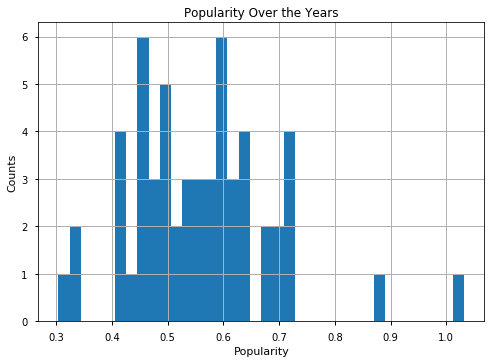

In [70]:
##Exploring popularity variable over the years to determine typical ratings by audiences
df_new['popularity'].hist(bins=36)
plt.xlabel('Popularity')
plt.ylabel('Counts')
plt.title('Popularity Over the Years');
plt.style.use('seaborn-notebook')
plt.show()

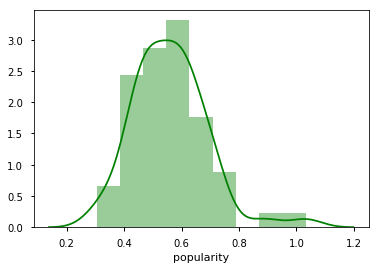

In [98]:
#using seaborn distplot which helps in visualising the type of distribution
sns.distplot(df_new['popularity'],color='g')

In [65]:
# We wish to determine if over the years, there is typical popularity rating
df_new['popularity'].describe()

count    56.000000
mean      0.559693
std       0.128434
min       0.304112
25%       0.469625
50%       0.546928
75%       0.626934
max       1.032126
Name: popularity, dtype: float64

# Observations about Popularity Ratings:


from histogram and quartile percentages, maximum ratings received fall in the range of 0.44 to 0.62 .
The distribution is skewed to right.
It is observed that no values lie in different ranges like 0.34-0.4, 0.64-0.66, 0.73-0.88, etc.Further scrutiny is required.


# Revenue

We wish to determine if over the years, what is the likely revenue a movie will generate
Accordingly, we use a histogram to observe the counts of revenues from our dataset
Maximum counts will reflect the typical revenue earned by movies

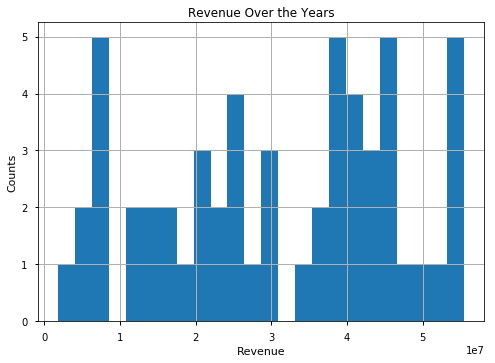

In [72]:
#Exploring revenue variable over the years to determine typical revenues grossed by the movies
df_new['revenue'].hist(bins=24)
plt.xlabel('Revenue')
plt.ylabel('Counts')
plt.style.use('seaborn-notebook')
plt.title('Revenue Over the Years');
plt.show()

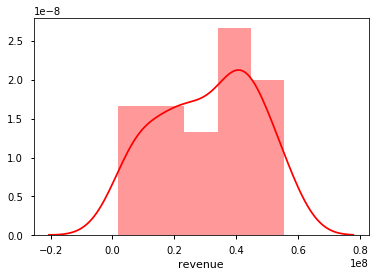

In [100]:
#using seaborn distplot which helps in visualising the type of distribution
sns.distplot(df_new['revenue'],color='r')

In [73]:
# We want to determine if over the years, there is typical revenue received
df_new['revenue'].describe()

count    5.600000e+01
mean     3.076766e+07
std      1.574209e+07
min      1.842102e+06
25%      1.815642e+07
50%      3.257984e+07
75%      4.293171e+07
max      5.549569e+07
Name: revenue, dtype: float64

# Observations of Revenues:

From the plots and histogram, we can see that:

Distribution is left skewed.
Revenues vary widely.
Most movie revenues fall in the 3.7e+07 to 4.8e+07 ranges.. `

### Research Question 2 

What are variables that are associated with the revenues of movies spanning over the years? If so, by how much?

In [41]:
#using correlation to determine factors influencing revenues
df_new.corr(method='pearson')

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
id,1.000000,0.612610,0.100292,0.152558,-0.441775,0.539964,-0.297719,-0.148336,-0.299723
popularity,0.612610,1.000000,0.668215,0.759156,-0.488974,0.849314,-0.574979,0.458952,-0.100506
budget,0.100292,0.668215,1.000000,0.906124,-0.401485,0.782026,-0.731797,0.891925,-0.158415
revenue,0.152558,0.759156,0.906124,1.000000,-0.466239,0.809243,-0.706442,0.767164,0.074952
runtime,-0.441775,-0.488974,-0.401485,-0.466239,1.000000,-0.612715,0.524770,-0.073168,0.300077
vote_count,0.539964,0.849314,0.782026,0.809243,-0.612715,1.000000,-0.658819,0.505434,-0.215568
vote_average,-0.297719,-0.574979,-0.731797,-0.706442,0.524770,-0.658819,1.000000,-0.557569,0.377204
budget_adj,-0.148336,0.458952,0.891925,0.767164,-0.073168,0.505434,-0.557569,1.000000,0.050086
revenue_adj,-0.299723,-0.100506,-0.158415,0.074952,0.300077,-0.215568,0.377204,0.050086,1.000000


# Revenue vs Popularity:

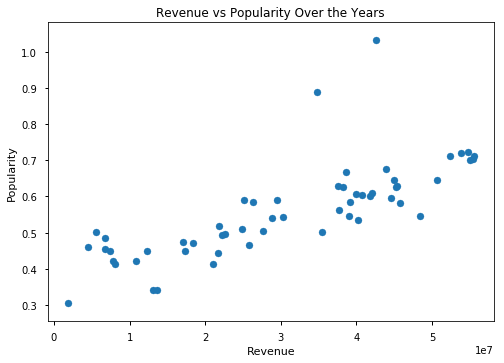

In [76]:
# Creating a scatterplot of revenue and popularity
plt.scatter(x=df_new['revenue'], y=df_new['popularity'])
plt.xlabel('Revenue')
plt.ylabel('Popularity')
plt.title('Revenue vs Popularity Over the Years');

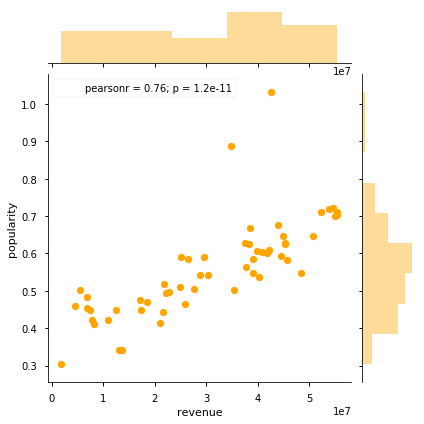

In [114]:
#creating a join plot using seaborn
sns.jointplot(x=df_new['revenue'], y=df_new['popularity'],color="orange")

# Observations- Revenue vs Popularity:
The correlation computed from function is evident in the scatterplot.
Popularity is proportional to revenues.
The few outliers that grossed medium but were rated extremely high need to be looked into.

# Revenue vs Vote counts:

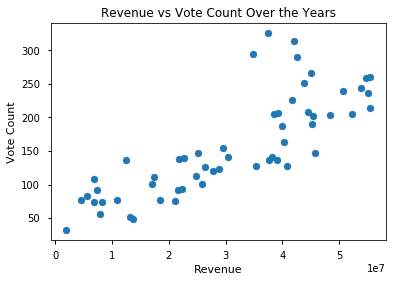

In [102]:
# Creating a scatterplot of revenue and vote counts over the years
plt.scatter(x=df_new['revenue'], y=df_new['vote_count'])
plt.xlabel('Revenue')
plt.ylabel('Vote Count')
plt.title('Revenue vs Vote Count Over the Years');

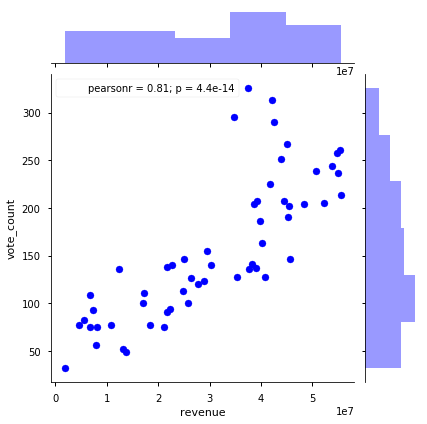

In [115]:
#creating a join plot using seaborn
sns.jointplot(x=df_new['revenue'], y=df_new['vote_count'],color="blue")

# Observations- Revenue vs Vote Count:
The correlation computed from function is evident in the scatterplot.
Vote count is roughly proportional to revenues.
Even in this plot, we observe that a few sample had high counts but did not gross commensurately in revenue.
This plot points us to scrutinize the vote counts and type of votes if possible or any other factors influencing voting such as genres, cast, etc.

# Revenue vs Vote averages:

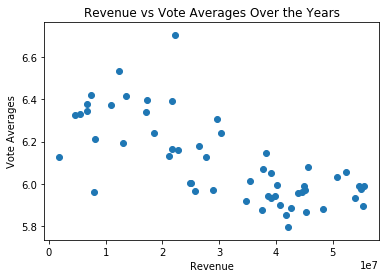

In [47]:
# Creating a scatterplot of revenue and vote  over the years
plt.scatter(x=df_new['revenue'], y=df_new['vote_average'])
plt.xlabel('Revenue')
plt.ylabel('Vote Averages')
plt.title('Revenue vs Vote Averages Over the Years');

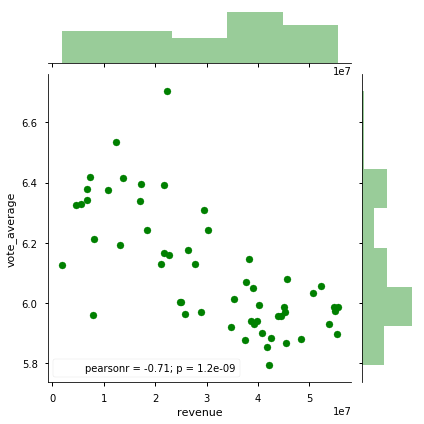

In [117]:
#creating a join plot using seaborn
sns.jointplot(x=df_new['revenue'], y=df_new['vote_average'],color="green")

# Observations- Revenue vs Vote Average:
The correlation computed from function is evident in the scatterplot.
Vote averages are inversely proportional to revenues.
Considering this plot and the previous, we can infer voting variables as influencing revenues. This means that detailed analysis is required to assess the outliers and possibly pursue a detailed line of investigation based on vote counts and averages.

# Limitations:
1.In above analysis, we have seen runtimes, popularity and revenues.

2.We have restricted ourselves to only numerical values of revenues. Any variances in currencies, like dollars, rupees, Euros, etc. have  not been considered.

3.In the case of varying currencies which is likely as the movies ranges from different regions, exchange rates or conversions or some sort of normalization needed to be applied.

3.We have not considered different revenue sources like movies audio rights sales, ticket sales, digital sales, braodcast sales, etc. and disregard the period and markets over which the revenues are collected. Older movies that are casted over television or re-released which might garnered higher revenues are examples of limitations of the dataset and hence, this EDA.

4.Vote counts have been taken at face value. We are not inspecting the nature of votes, good or bad or any other range of values. Also, the period or channels in which these vote counts were gathered is not considered and will be significant if varying for different movies.

5.The medium through which popularity is determined is unknown. This can impact the analysis as the limitations and bias inherent while gauging audience response will be present in the end values as well.

6.This analysis assumes that the same methods and index were employed for collecting popularity factors and counting votes for all the movies. In the event that it is not so, the results might not hold true. A possibility since movies are from different 
countries and languages.

7.While we did not have  missing values for any of the factors taken under consideration, we can acknowledge the presence of these limitations and assumptions in our analysis of the dataset.

<a id='conclusions'></a>
## Conclusions

1.From our analysis, we discovered that over the years, there are patterns to runtimes, popularity and revenues.
While only tentative, we have found that popular runtimes range between 90 and 100 minutes.

2.Revenues showed a wider range, but the most likely range was 8.838806e+07 to 1.028258e+08.

3.We also analyzed multiple variables. Specifically, we chose to analyze over time [release_date], the effect of particular variables [votes and popularity] on our factor of interest [revenue].

4.Based on this analysis, we found that over the years, popularity and revenue show a direct relation.
Vote counts and revenue are related positively while vote averages are inversely related to revenues.
However, these relations are merely correlations and do not imply causation.

5.These lines of analysis point to the need for further investigation, especially with votes.

# Thank you